# **Fitbit Data Analysis to predict calorie expenditure**

---



In [118]:
!pip install opendatasets --quiet


In [119]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/arashnic/fitbit")

Skipping, found downloaded files in "./fitbit" (use force=True to force download)


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df_daily_activity= pd.read_csv("/content/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
df_daily_activity.head()
df_sleep= pd.read_csv("/content/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
df_sleep.head()
df_weight= pd.read_csv("/content/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
df_weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [122]:
df_daily_activity.info()
df_daily_activity.describe()
df_daily_activity.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

,0
Id,0
ActivityDate,0
TotalSteps,0
TotalDistance,0
TrackerDistance,0
LoggedActivitiesDistance,0
VeryActiveDistance,0
ModeratelyActiveDistance,0
LightActiveDistance,0
SedentaryActiveDistance,0


# Several Steps to clean,organize data and prepare data for training

In [124]:
df_weight["Fat"]=df_weight["Fat"].fillna(0)

In [126]:
df_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             67 non-null     float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [127]:
df_daily_activity['ActivityDate'] = pd.to_datetime(df_daily_activity['ActivityDate'])
df_sleep['SleepDay'] = pd.to_datetime(df_sleep['SleepDay'])
df_weight['Date'] = pd.to_datetime(df_weight['Date'])


<ipython-input-127-d2a6fa055ee9>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sleep['SleepDay'] = pd.to_datetime(df_sleep['SleepDay'])
<ipython-input-127-d2a6fa055ee9>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_weight['Date'] = pd.to_datetime(df_weight['Date'])


In [129]:
df = df_daily_activity.merge(df_sleep, left_on=['Id'], right_on=['Id'], how='left')
df = df.merge(df_weight, left_on=['Id'], right_on=['Id'], how='left')

In [130]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,1.0,327.0,346.0,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.65,True,1.462234e+12
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,1.0,327.0,346.0,2016-05-03 23:59:59,52.599998,115.963147,0.0,22.65,True,1.462320e+12
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,2.0,384.0,407.0,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.65,True,1.462234e+12
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,2.0,384.0,407.0,2016-05-03 23:59:59,52.599998,115.963147,0.0,22.65,True,1.462320e+12
4,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,1.0,412.0,442.0,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.65,True,1.462234e+12


In [131]:
df["IsManualReport"]= df["IsManualReport"].astype(bool)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43482 entries, 0 to 43481
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        43482 non-null  int64         
 1   ActivityDate              43482 non-null  datetime64[ns]
 2   TotalSteps                43482 non-null  int64         
 3   TotalDistance             43482 non-null  float64       
 4   TrackerDistance           43482 non-null  float64       
 5   LoggedActivitiesDistance  43482 non-null  float64       
 6   VeryActiveDistance        43482 non-null  float64       
 7   ModeratelyActiveDistance  43482 non-null  float64       
 8   LightActiveDistance       43482 non-null  float64       
 9   SedentaryActiveDistance   43482 non-null  float64       
 10  VeryActiveMinutes         43482 non-null  int64         
 11  FairlyActiveMinutes       43482 non-null  int64         
 12  LightlyActiveMinut

In [133]:
df["SleepDay"]=df["SleepDay"].fillna(0)
df["TotalSleepRecords"]= df["TotalSleepRecords"].fillna(0)
df["TotalMinutesAsleep"]= df["TotalMinutesAsleep"].fillna(df["TotalMinutesAsleep"].mean())
df["TotalTimeInBed"]= df["TotalTimeInBed"].fillna(df["TotalTimeInBed"].mean())

df["WeightKg"]= df["WeightKg"].fillna(df["WeightKg"].mean())
df["Fat"]= df["Fat"].fillna(df["Fat"].mean())
df["IsManualReport"]= df["IsManualReport"].fillna(False)
df["Date"]


,Date
0,2016-05-02 23:59:59
1,2016-05-03 23:59:59
2,2016-05-02 23:59:59
3,2016-05-03 23:59:59
4,2016-05-02 23:59:59
...,...
43477,2016-05-06 06:43:35
43478,2016-05-08 07:35:53
43479,2016-05-09 06:39:44
43480,2016-05-11 06:51:47


In [134]:
mode_date = df['Date'].mode()[0]
df['Date'] = df['Date'].fillna(mode_date)
df["WeightPounds"]=df["WeightPounds"].fillna(df["WeightPounds"].mean())
df["BMI"]= df["BMI"].fillna(df["BMI"].mean())


In [135]:
df["LogId"]= df["LogId"].fillna(0)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43482 entries, 0 to 43481
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        43482 non-null  int64         
 1   ActivityDate              43482 non-null  datetime64[ns]
 2   TotalSteps                43482 non-null  int64         
 3   TotalDistance             43482 non-null  float64       
 4   TrackerDistance           43482 non-null  float64       
 5   LoggedActivitiesDistance  43482 non-null  float64       
 6   VeryActiveDistance        43482 non-null  float64       
 7   ModeratelyActiveDistance  43482 non-null  float64       
 8   LightActiveDistance       43482 non-null  float64       
 9   SedentaryActiveDistance   43482 non-null  float64       
 10  VeryActiveMinutes         43482 non-null  int64         
 11  FairlyActiveMinutes       43482 non-null  int64         
 12  LightlyActiveMinut

In [137]:
df["ActivityDate"] = pd.to_datetime(df["ActivityDate"], errors="coerce")
df["ActivityDate"]= df["ActivityDate"].dt.date
df["SleepDay"] = pd.to_datetime(df["SleepDay"], errors="coerce")
df["SleepDay"]= df["SleepDay"].dt.date
df["Date"]= df["Date"].dt.date

## Finding correaltion between features

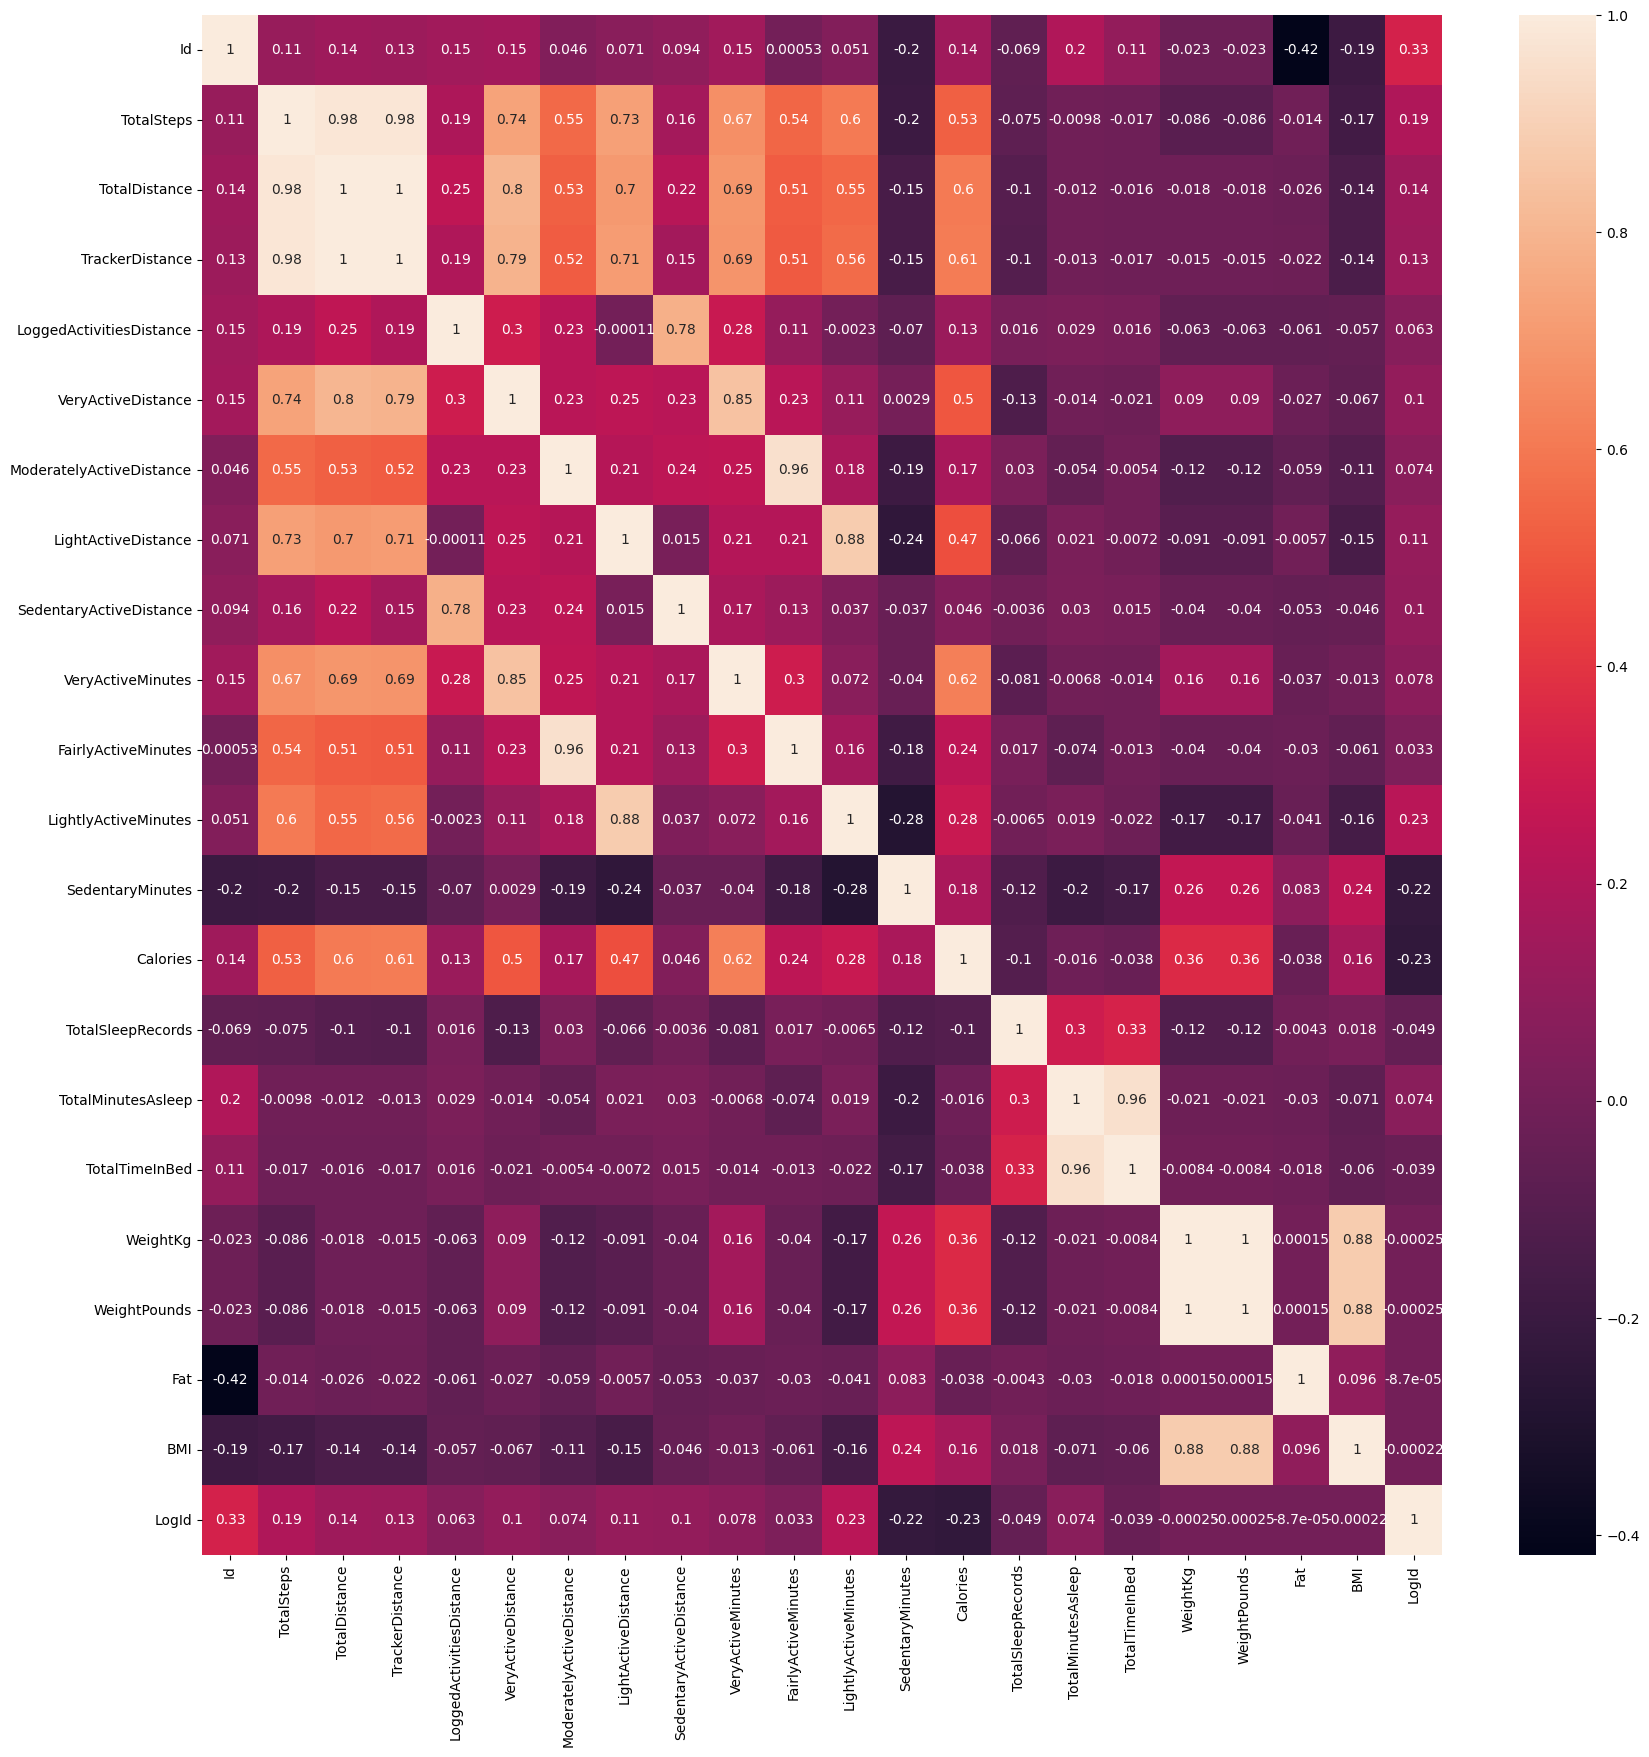

In [138]:
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(20,20))
sns.heatmap(numerical_df.corr(),annot=True)
plt.show()

# Dividing data into features of importance for calorie prediction

In [139]:
# Choosing features of importance and target
features_to_drop= ["Id", "IsManualReport", "Date", "SleepDay","ActivityDate","Calories"]
dependant_features = [col for col in df.columns if col not in features_to_drop]
target ="Calories"

X= df[dependant_features]
y= df[target]



# Spliting data into train and test sets

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


# Training different models to check for best Prediction

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score

In [142]:
# Linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression Metrics:")
print(f"  Mean Squared Error (MSE): {lr_mse}")
print(f"  R-squared (R2): {lr_r2}")

# Decison Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print("\nDecision Tree Metrics:")
print(f"  Mean Squared Error (MSE): {dt_mse}")
print(f"  R-squared (R2): {dt_r2}")

# Random forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("\nRandom Forest Metrics:")
print(f"  Mean Squared Error (MSE): {rf_mse}")
print(f"  R-squared (R2): {rf_r2}")


# XGboost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)


print("\nXGBoost Metrics:")
print(f"  Mean Squared Error (MSE): {xgb_mse}")
print(f"  R-squared (R2): {xgb_r2}")

# SVR
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_pred)
svm_r2 = r2_score(y_test, svm_pred)

print("\nSVR Metrics:")
print(f"  Mean Squared Error (MSE): {svm_mse}")
print(f"  R-squared (R2): {svm_r2}")

Linear Regression Metrics:
  Mean Squared Error (MSE): 79685.16438878381
  R-squared (R2): 0.7232809813116381

Decision Tree Metrics:
  Mean Squared Error (MSE): 2554.3420409255386
  R-squared (R2): 0.9911296534507892

Random Forest Metrics:
  Mean Squared Error (MSE): 1332.4988445757137
  R-squared (R2): 0.9953726923260728

XGBoost Metrics:
  Mean Squared Error (MSE): 1307.33251953125
  R-squared (R2): 0.9954600930213928

SVR Metrics:
  Mean Squared Error (MSE): 274570.5406843409
  R-squared (R2): 0.04651146594612232


# Trying hyperparameter tuning for Xgboost

In [143]:
# !pip install optuna -q

In [144]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def objective(trial):
    """Defines the objective function for Optuna."""
    param = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'seed': 42
    }

    model = XGBRegressor(**param)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    rmse = -scores.mean()

    return rmse

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)  # Adjust n_trials as needed

print("Number of finished trials:", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# Train the final model with the best parameters
best_params = study.best_params
final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
final_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_pred)
final_r2 = r2_score(y_test, final_pred)

print("\nFinal XGBoost Model Metrics (with hyperparameter tuning):")
print(f"  Mean Squared Error (MSE): {final_mse}")
print(f"  R-squared (R2): {final_r2}")

[I 2025-05-23 07:25:22,328] A new study created in memory with name: no-name-01567851-1d3b-426e-80f3-e5b00284ec97
[I 2025-05-23 07:25:28,490] Trial 0 finished with value: 283736.6875 and parameters: {'n_estimators': 998, 'learning_rate': 1.660329149155634e-05, 'max_depth': 3, 'subsample': 0.7186658372554736, 'colsample_bytree': 0.4422072521988912, 'reg_alpha': 2.178327650648678e-06, 'reg_lambda': 0.0002044011204008353, 'gamma': 0.06107166630597035, 'min_child_weight': 2}. Best is trial 0 with value: 283736.6875.
[I 2025-05-23 07:25:31,503] Trial 1 finished with value: 273339.0833333333 and parameters: {'n_estimators': 479, 'learning_rate': 0.00010879319209642842, 'max_depth': 4, 'subsample': 0.017560743177212196, 'colsample_bytree': 0.2749378474314415, 'reg_alpha': 4.1633226836372784e-05, 'reg_lambda': 1.8952468499823664e-08, 'gamma': 4.331931953435449e-06, 'min_child_weight': 10}. Best is trial 1 with value: 273339.0833333333.
[I 2025-05-23 07:25:38,517] Trial 2 finished with value: 2

Number of finished trials: 100
Best trial:
  Value: 1066.720479329427
  Params: 
    n_estimators: 948
    learning_rate: 0.05793096166515091
    max_depth: 7
    subsample: 0.8349500376508735
    colsample_bytree: 0.7527862183869704
    reg_alpha: 2.3357415165479763e-06
    reg_lambda: 3.2049143760396155e-07
    gamma: 5.703245217759051e-05
    min_child_weight: 2

Final XGBoost Model Metrics (with hyperparameter tuning):
  Mean Squared Error (MSE): 546.9869995117188
  R-squared (R2): 0.9981005191802979


# SHAP analysis

Generating SHAP summary plot...


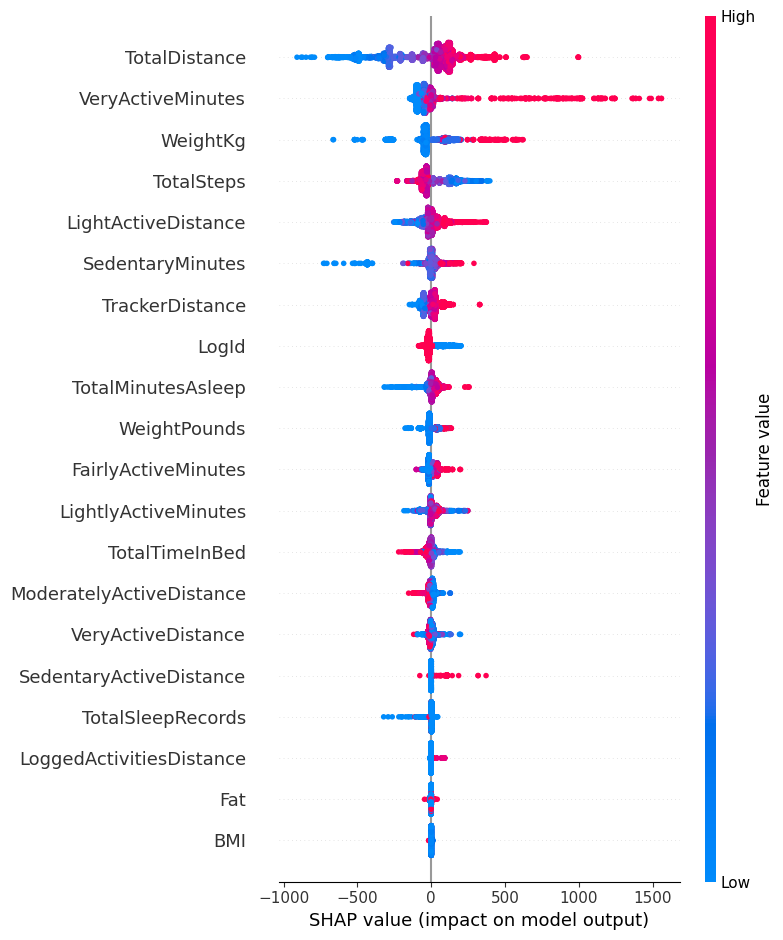


Generating SHAP bar plot of feature importance...


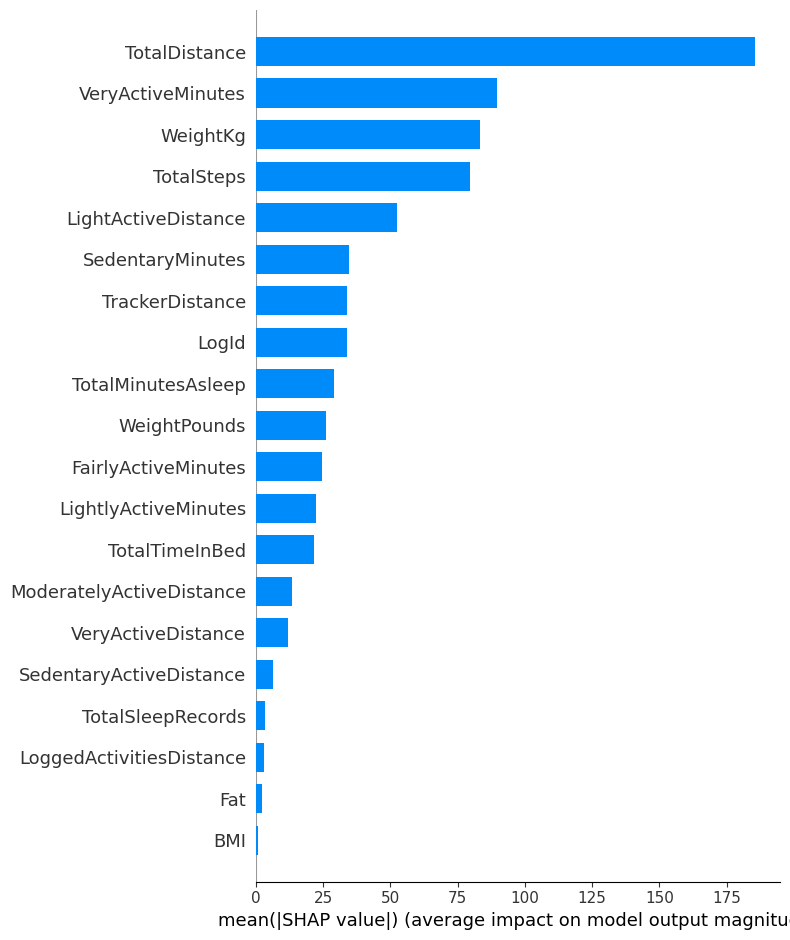


Generating SHAP force plot for instance 0...


In [146]:

# !pip install shap -q

import shap


# Create a SHAP explainer for tree-based models
explainer = shap.TreeExplainer(final_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

print("Generating SHAP summary plot...")
shap.summary_plot(shap_values, X_test)
plt.show()

print("\nGenerating SHAP bar plot of feature importance...")
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()


instance_index = 0
print(f"\nGenerating SHAP force plot for instance {instance_index}...")

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[instance_index, :], X_test.iloc[instance_index, :])

# Insights

- Distance-related features (TotalDistance, TrackerDistance, and ActiveMinutes) remain the strongest predictors. The model consistently relies on movement patterns.
- WeightKg and BMI have a measurable impact, meaning body weight plays a role, but BMI isn't as influential as pure weight.
- Sleep features (TotalMinutesAsleep, TotalTimeInBed) have low importance, indicating they don’t drive predictions significantly.
- SedentaryMinutes and LightActiveDistance contribute moderately, but their effect isn’t dominant.
- Redundant features (Fat, BMI to some extent) might be removed, simplifying the model without losing accuracy.

